In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegressionCV, RidgeClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_recall_curve, precision_score, recall_score, auc, confusion_matrix, roc_curve, RocCurveDisplay

# **Data exploration and visualization**

In [58]:
df = pd.read_csv("phase2_students.csv")
df.head()

,flow_time,header_size,packet_duration,overall_rate,src_rate,dst_rate,fin_packets,urg_packets,rst_packets,max_value,...,syn_flags,rst_flags,psh_flags,ack_flags,protocol_http,protocol_https,protocol_tcp,protocol_udp,protocol_icmp,label
0,0.041268,15499.00,64.00,7805.845961,7805.845961,0.0,0.0,0.00,0.00,50.00,...,0,0,0,0,0,0,0,1,0,DDoS
1,0.018393,3702.54,64.00,6728.994198,6728.994198,0.0,0.0,0.00,0.01,54.28,...,0,0,0,0,0,0,0,1,0,DDoS
2,0.000000,182.00,64.00,38.559448,38.559448,0.0,0.0,0.00,0.00,182.00,...,0,0,0,0,0,0,0,1,0,DoS
3,0.109292,35027.55,62.72,6783.234241,6783.234241,0.0,0.0,0.03,0.11,65.11,...,0,0,0,0,0,0,0,1,0,DoS
4,0.000000,162.00,64.00,2.305494,2.305494,0.0,0.0,0.00,0.00,162.00,...,0,0,0,0,0,0,0,1,0,DoS


In [59]:
df.shape

(938583, 22)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938583 entries, 0 to 938582
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   flow_time         938583 non-null  float64
 1   header_size       938583 non-null  float64
 2   packet_duration   938583 non-null  float64
 3   overall_rate      938583 non-null  float64
 4   src_rate          938583 non-null  float64
 5   dst_rate          938583 non-null  float64
 6   fin_packets       938583 non-null  float64
 7   urg_packets       938583 non-null  float64
 8   rst_packets       938583 non-null  float64
 9   max_value         938583 non-null  float64
 10  value_covariance  938583 non-null  float64
 11  fin_flags         938583 non-null  int64  
 12  syn_flags         938583 non-null  int64  
 13  rst_flags         938583 non-null  int64  
 14  psh_flags         938583 non-null  int64  
 15  ack_flags         938583 non-null  int64  
 16  protocol_http     93

In [61]:
df.describe()

,flow_time,header_size,packet_duration,overall_rate,src_rate,dst_rate,fin_packets,urg_packets,rst_packets,max_value,...,fin_flags,syn_flags,rst_flags,psh_flags,ack_flags,protocol_http,protocol_https,protocol_tcp,protocol_udp,protocol_icmp
count,9.385830e+05,9.385830e+05,938583.000000,9.385830e+05,9.385830e+05,938583.000000,938583.000000,938583.000000,938583.000000,938583.000000,...,938583.000000,938583.000000,938583.000000,938583.000000,938583.000000,938583.000000,938583.000000,938583.000000,938583.000000,938583.000000
mean,1.342515e+01,1.018134e+05,82.664589,9.163496e+03,9.163496e+03,0.000002,0.099474,5.850813,37.137514,177.161360,...,0.087102,0.208346,0.091149,0.088415,0.121502,0.048001,0.054196,0.574175,0.211410,0.164314
std,5.898099e+03,1.801377e+06,166.986325,1.001806e+05,1.001806e+05,0.000898,0.299712,70.715367,324.613580,515.425327,...,0.281984,0.406126,0.287821,0.283898,0.326710,0.213769,0.226403,0.494468,0.408309,0.370560
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,42.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,5.400000e+01,64.000000,2.077046e+00,2.077046e+00,0.000000,0.000000,0.000000,0.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000e+00,5.400000e+01,64.000000,1.570377e+01,1.570377e+01,0.000000,0.000000,0.000000,0.000000,54.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.017542e-01,3.640000e+02,64.000000,1.177706e+02,1.177706e+02,0.000000,0.000000,0.000000,0.010000,55.140000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,4.930147e+06,3.311174e+08,6525.740000,7.340032e+06,7.340032e+06,0.848465,19.500000,4136.700000,9331.500000,30329.200000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
df.columns

Index(['flow_time', 'header_size', 'packet_duration', 'overall_rate',
       'src_rate', 'dst_rate', 'fin_packets', 'urg_packets', 'rst_packets',
       'max_value', 'value_covariance', 'fin_flags', 'syn_flags', 'rst_flags',
       'psh_flags', 'ack_flags', 'protocol_http', 'protocol_https',
       'protocol_tcp', 'protocol_udp', 'protocol_icmp', 'label'],
      dtype='object')

In [63]:
df.isna().sum()

,0
flow_time,0
header_size,0
packet_duration,0
overall_rate,0
src_rate,0
dst_rate,0
fin_packets,0
urg_packets,0
rst_packets,0
max_value,0


In [64]:
df.dropna(inplace=True)

In [65]:
df.duplicated().sum()

np.int64(96187)

In [66]:
df.drop_duplicates(inplace=True)

In [67]:
df.duplicated().sum()

np.int64(0)

In [68]:
df["label"].unique()

array(['DDoS', 'DoS', 'BenignTraffic', 'Mirai', 'Recon', 'MITM'],
      dtype=object)

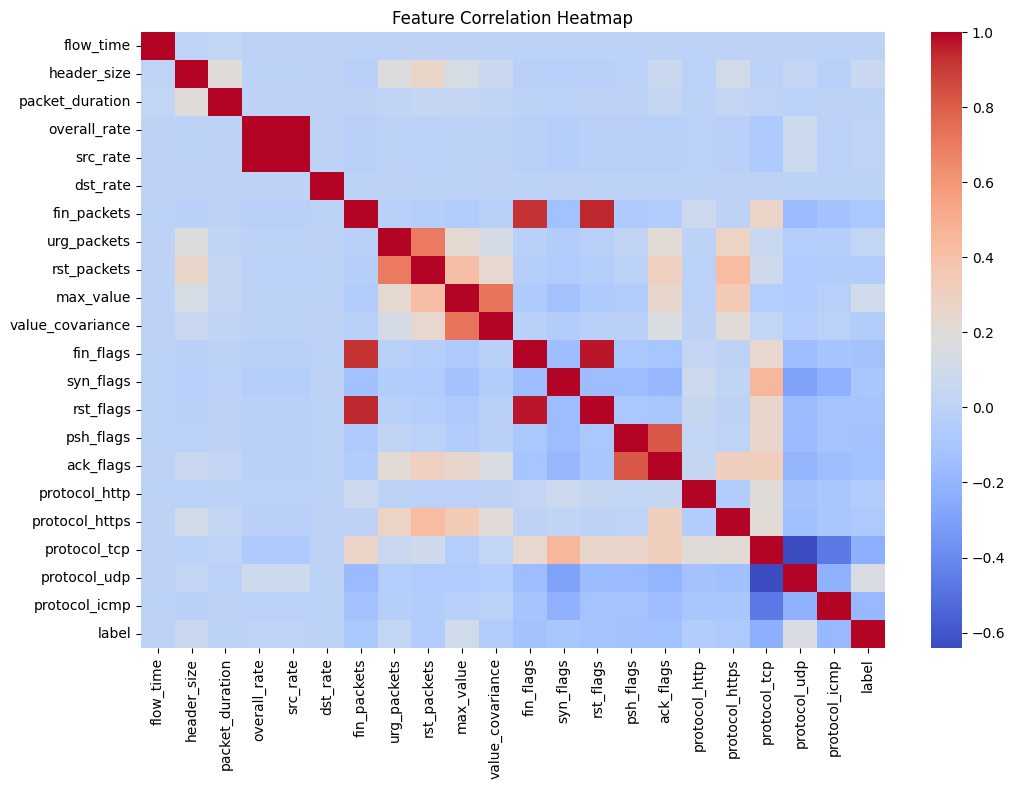

In [69]:
categorical_columns = df.select_dtypes(include=["object"]).columns.tolist()

le = LabelEncoder()
df["label"] = le.fit_transform(df["label"])

correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [70]:
abs(correlation_matrix["label"]).sort_values(ascending=False)

,label
label,1.000000
protocol_tcp,0.232204
protocol_icmp,0.178745
protocol_udp,0.150481
ack_flags,0.134799
fin_flags,0.128302
psh_flags,0.128180
rst_flags,0.110701
max_value,0.100210
syn_flags,0.094010


In [71]:
df.head()

,flow_time,header_size,packet_duration,overall_rate,src_rate,dst_rate,fin_packets,urg_packets,rst_packets,max_value,...,syn_flags,rst_flags,psh_flags,ack_flags,protocol_http,protocol_https,protocol_tcp,protocol_udp,protocol_icmp,label
0,0.041268,15499.00,64.00,7805.845961,7805.845961,0.0,0.0,0.00,0.00,50.00,...,0,0,0,0,0,0,0,1,0,1
1,0.018393,3702.54,64.00,6728.994198,6728.994198,0.0,0.0,0.00,0.01,54.28,...,0,0,0,0,0,0,0,1,0,1
2,0.000000,182.00,64.00,38.559448,38.559448,0.0,0.0,0.00,0.00,182.00,...,0,0,0,0,0,0,0,1,0,2
3,0.109292,35027.55,62.72,6783.234241,6783.234241,0.0,0.0,0.03,0.11,65.11,...,0,0,0,0,0,0,0,1,0,2
4,0.000000,162.00,64.00,2.305494,2.305494,0.0,0.0,0.00,0.00,162.00,...,0,0,0,0,0,0,0,1,0,2


In [73]:
df.reset_index(inplace=True)
count = 0
for i in range(df.shape[0]):
  if df["dst_rate"][i]!=0:
    x = df["dst_rate"][i]
    count+=1
    print(f"Index {i}, value {x}")
print(count)

Index 2157, value 0.015715958
Index 61561, value 0.009214532
Index 65874, value 0.004347681
Index 111089, value 0.009242477
Index 118883, value 0.03075674
Index 122038, value 0.005830426
Index 131132, value 0.069787533
Index 134845, value 0.031105173
Index 177400, value 0.018946106
Index 183709, value 0.010545692
Index 190278, value 0.009673334
Index 205701, value 0.031968951
Index 206693, value 0.006302482
Index 227659, value 0.006405396
Index 234566, value 0.010705564
Index 254912, value 0.022121769
Index 289091, value 0.006704182
Index 303879, value 0.00976801
Index 311117, value 0.005347829
Index 316902, value 0.041619242
Index 338062, value 0.009920851
Index 374882, value 0.009150362
Index 387746, value 0.004712696
Index 397840, value 0.018168258
Index 403591, value 0.006066045
Index 409619, value 0.00937165
Index 426040, value 0.00747033
Index 430678, value 0.006806936
Index 493937, value 0.014208387
Index 503617, value 0.005425677
Index 508575, value 0.015117616
Index 525445, va

In [74]:
df.drop(columns= ["index", "dst_rate", "overall_rate"], inplace=True)

In [75]:
df.columns

Index(['flow_time', 'header_size', 'packet_duration', 'src_rate',
       'fin_packets', 'urg_packets', 'rst_packets', 'max_value',
       'value_covariance', 'fin_flags', 'syn_flags', 'rst_flags', 'psh_flags',
       'ack_flags', 'protocol_http', 'protocol_https', 'protocol_tcp',
       'protocol_udp', 'protocol_icmp', 'label'],
      dtype='object')

In [76]:
df.head()

,flow_time,header_size,packet_duration,src_rate,fin_packets,urg_packets,rst_packets,max_value,value_covariance,fin_flags,syn_flags,rst_flags,psh_flags,ack_flags,protocol_http,protocol_https,protocol_tcp,protocol_udp,protocol_icmp,label
0,0.041268,15499.00,64.00,7805.845961,0.0,0.00,0.00,50.00,0.000000,0,0,0,0,0,0,0,0,1,0,1
1,0.018393,3702.54,64.00,6728.994198,0.0,0.00,0.01,54.28,13.579341,0,0,0,0,0,0,0,0,1,0,1
2,0.000000,182.00,64.00,38.559448,0.0,0.00,0.00,182.00,0.000000,0,0,0,0,0,0,0,0,1,0,2
3,0.109292,35027.55,62.72,6783.234241,0.0,0.03,0.11,65.11,191.472075,0,0,0,0,0,0,0,0,1,0,2
4,0.000000,162.00,64.00,2.305494,0.0,0.00,0.00,162.00,0.000000,0,0,0,0,0,0,0,0,1,0,2


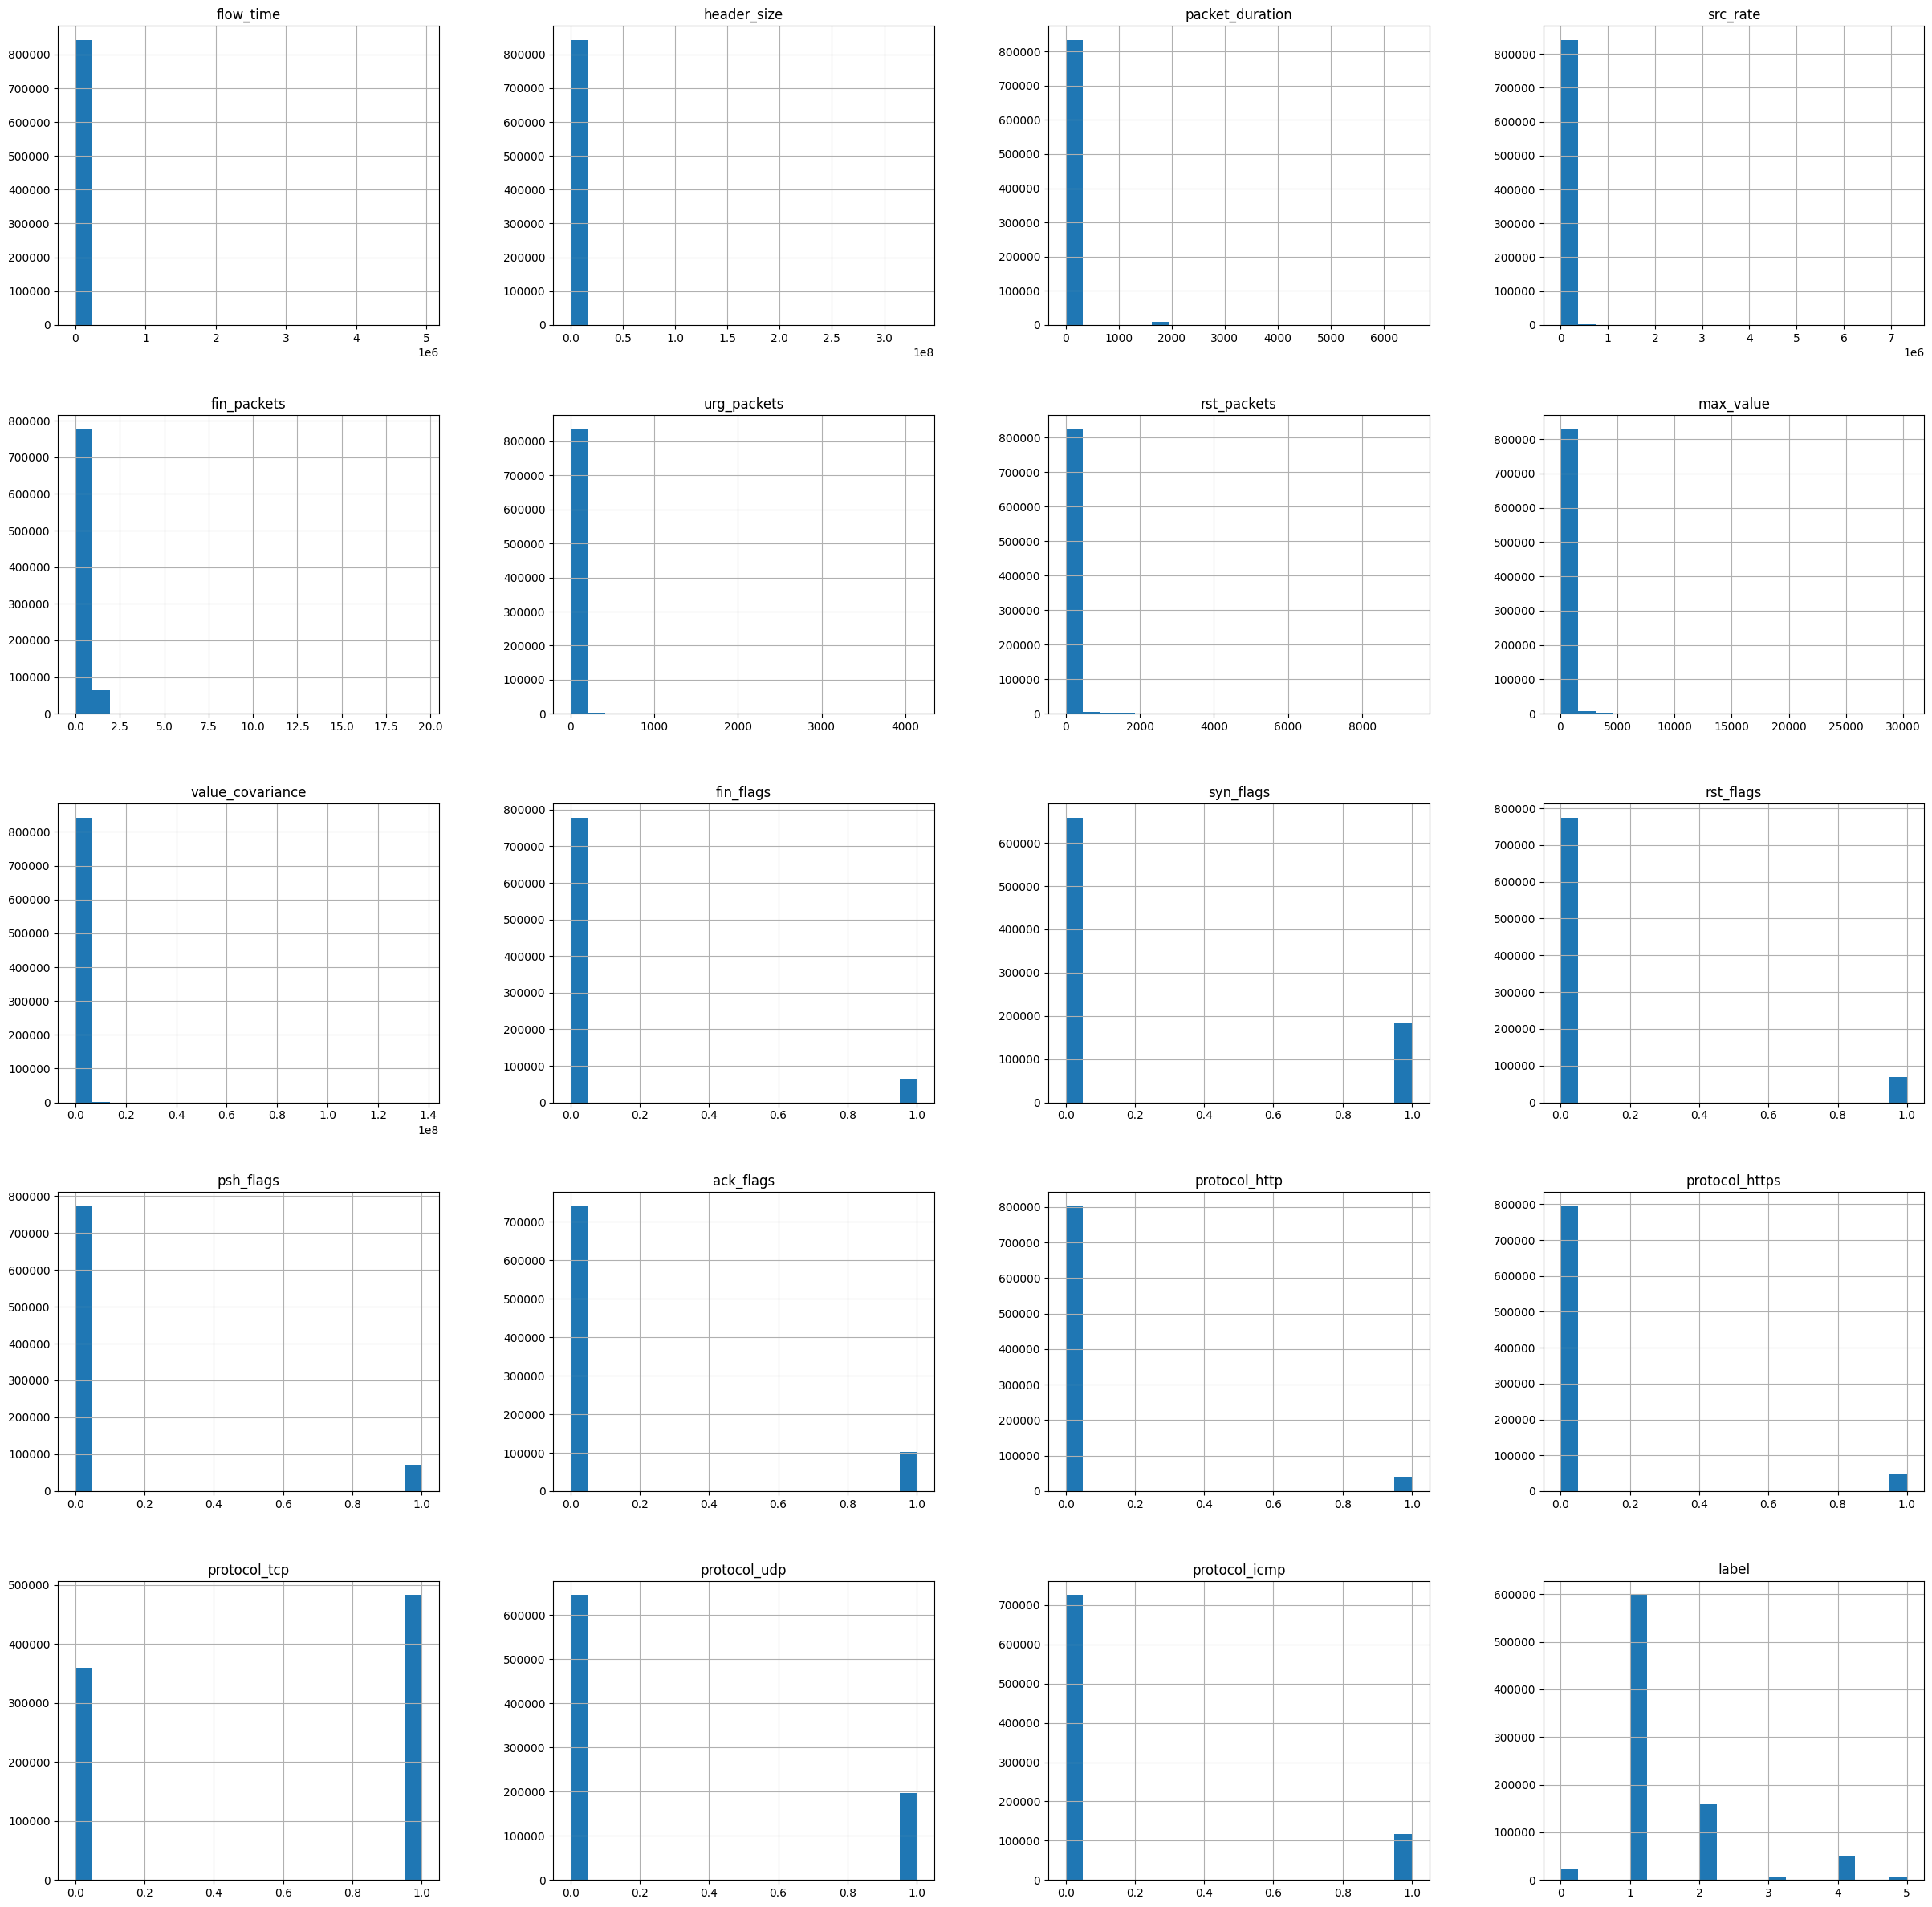

In [79]:
df.hist(bins=20, figsize=(30,30))
plt.show()

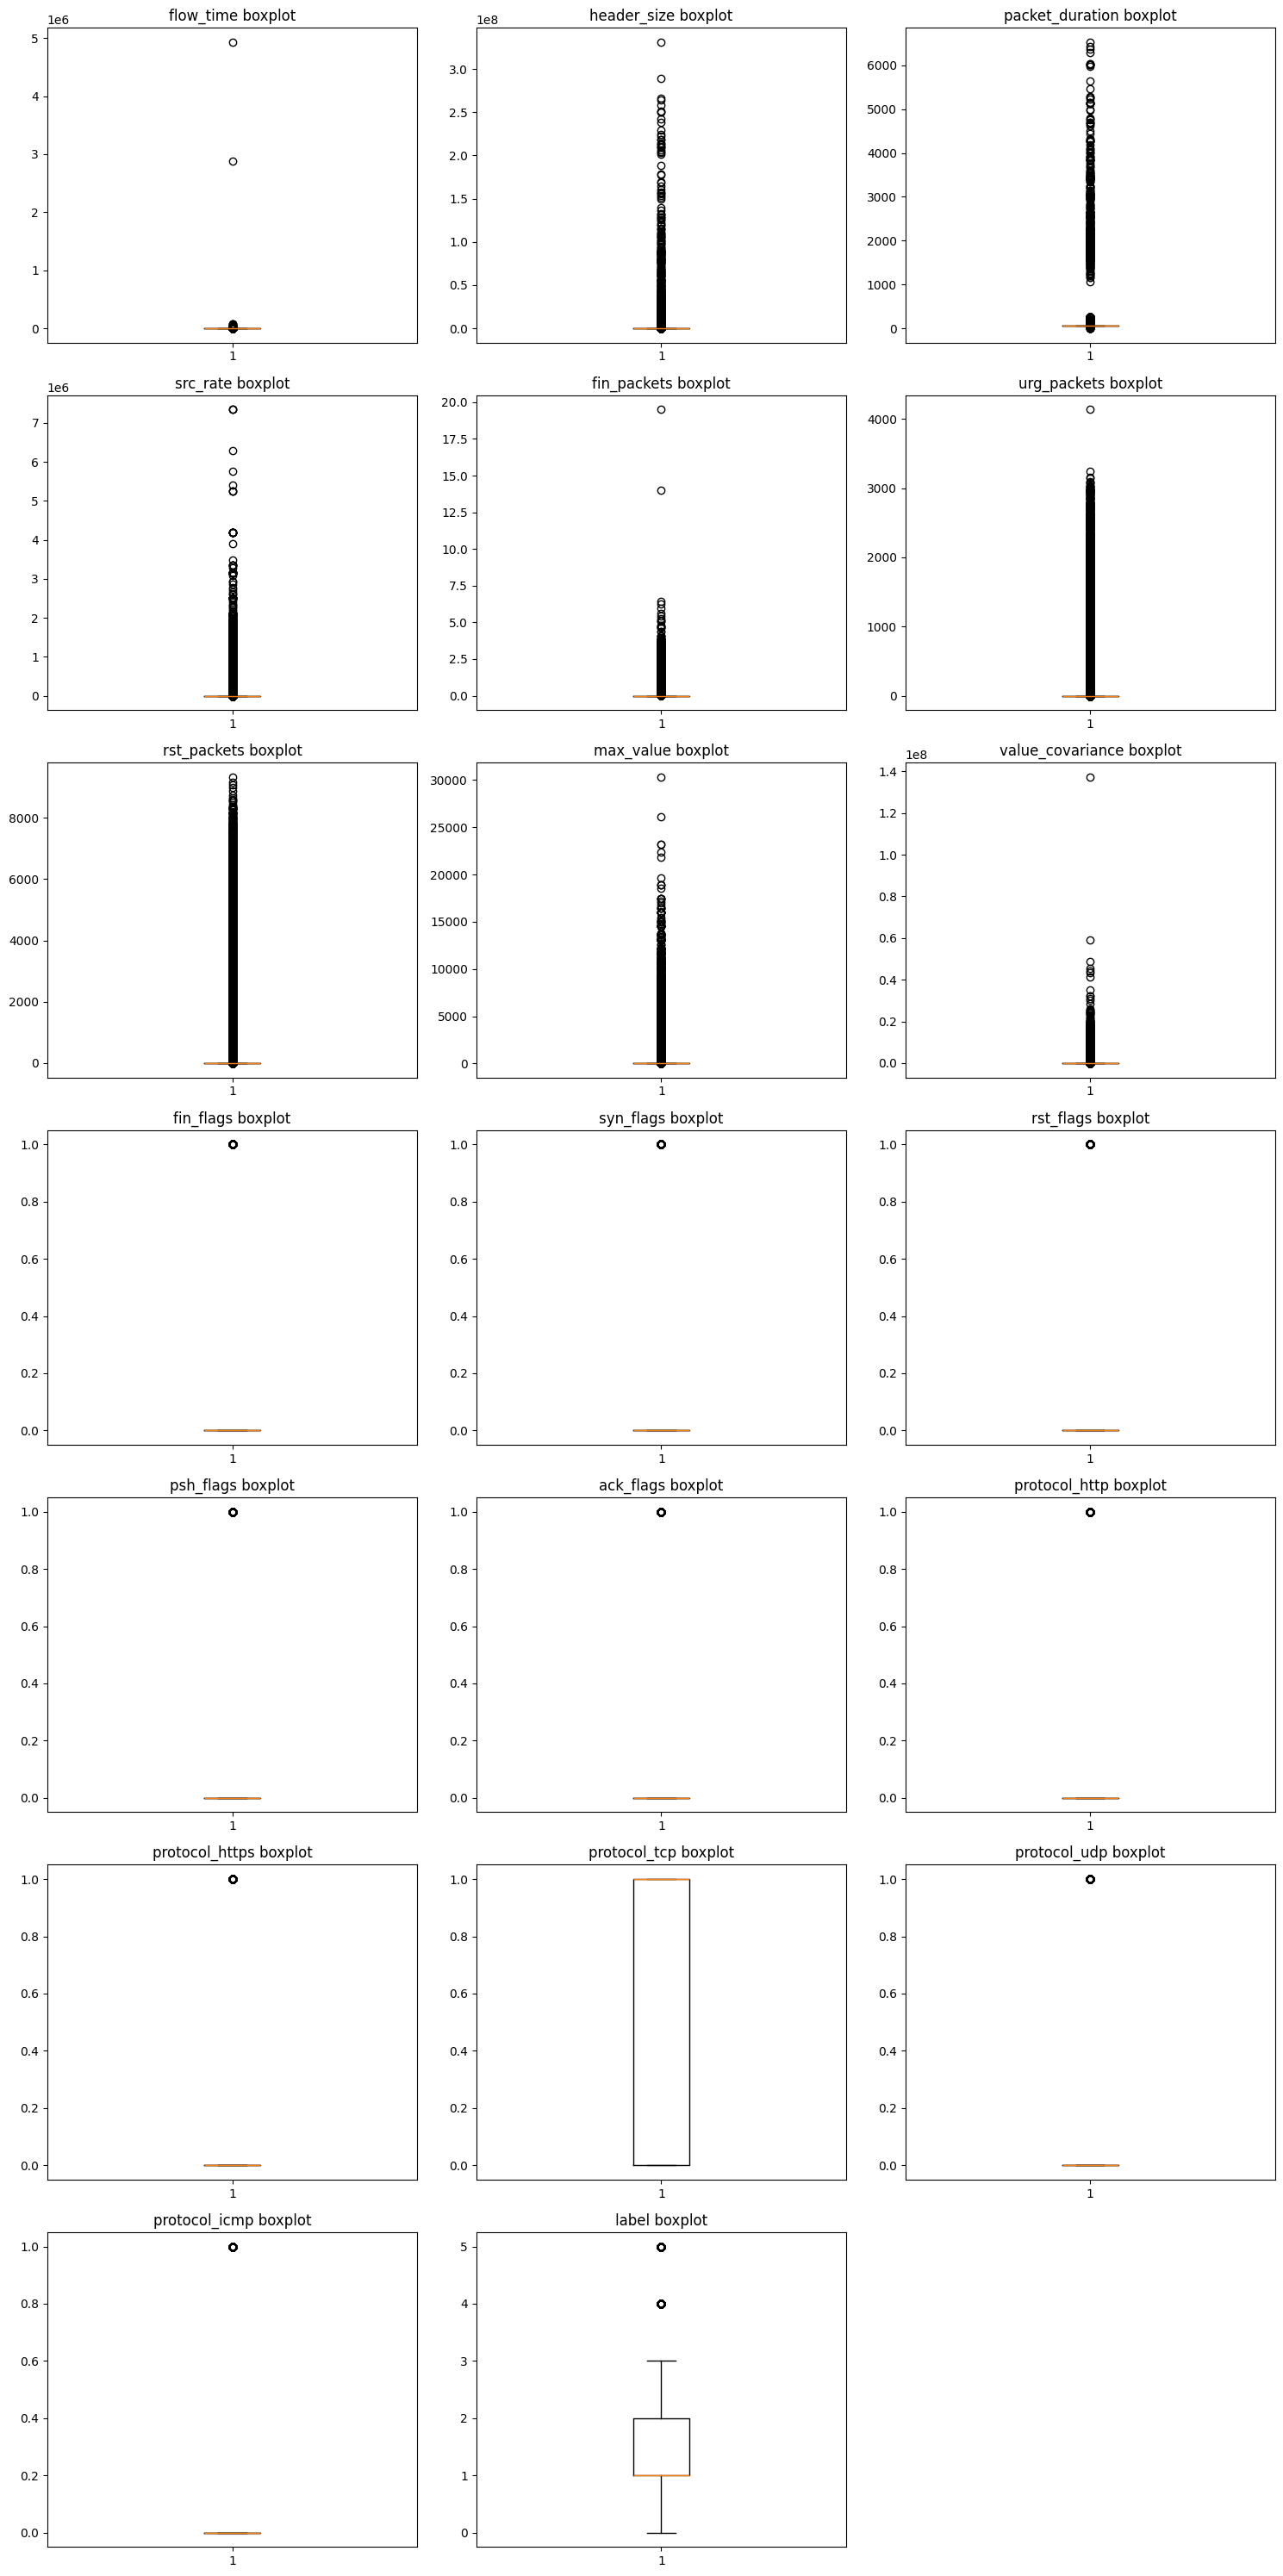

In [81]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(7, 3, figsize=(15, 30))
axes = axes.flatten()

for i in range(len(df.columns)):
    axes[i].boxplot(df[df.columns[i]])
    axes[i].set_title(f"{df.columns[i]} boxplot")

for j in range(len(df.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


# **Base model implementation**

In [84]:
x = df.drop(["label"], axis=1)
y = df["label"]
x_train, x_test, y_train,y_test = train_test_split(x,y,random_state=42, test_size=0.2)

In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, knn_pred)
print("Accuracy of KNN:", accuracy_knn)
precision_knn = precision_score(y_test, knn_pred)
print("Precision of KNN:", precision_knn)
recall_knn = recall_score(y_test, knn_pred)
print("Recall of KNN:", recall_knn)
f1_score_knn = f1_score(y_test, knn_pred)
print("F1 score of KNN:", f1_score_knn)
precision_knn, recall_knn, _ = precision_recall_curve(y_test, knn_pred)
auc_knn = auc(recall_knn, precision_knn)
print("AUC of KNN:", auc_knn)
confusion_matrix_knn = confusion_matrix(y_test, knn_pred)
print("Confusion Matrix of KNN:\n")
print(confusion_matrix_knn)

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(recall_knn, precision_knn, label=f'AUC = {auc_knn:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (KNN)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#SVM
svm = SVC(class_weight='balanced',kernel="rbf",C=100,gamma=0.1)
svm.fit(x_train, y_train)

svm_pred_scores = svm.predict(x_test)

svm_pred = (svm_pred_scores >= 0.6).astype(int)

accuracy_svm = accuracy_score(y_test, svm_pred)
print("Accuracy of SVM:", accuracy_svm)

precision_svm = precision_score(y_test, svm_pred)
print("Precision of SVM:", precision_svm)

recall_svm = recall_score(y_test, svm_pred)
print("Recall of SVM:", recall_svm)

f1_score_svm = f1_score(y_test, svm_pred)
print("F1 score of SVM:", f1_score_svm)

precision_curve_svm, recall_curve_svm, _ = precision_recall_curve(y_test, svm_pred_scores)
auc_svm = auc(recall_curve_svm, precision_curve_svm)
print("AUC of SVM:", auc_svm)

confusion_matrix_svm = confusion_matrix(y_test, svm_pred)
print("Confusion Matrix of SVM:")
print(confusion_matrix_svm)

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(recall_curve_svm, precision_curve_svm, label=f'AUC = {auc_svm:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (SVM)')
plt.legend()
plt.grid(True)
plt.show()